# Active Cases in Kerala(MAPS)
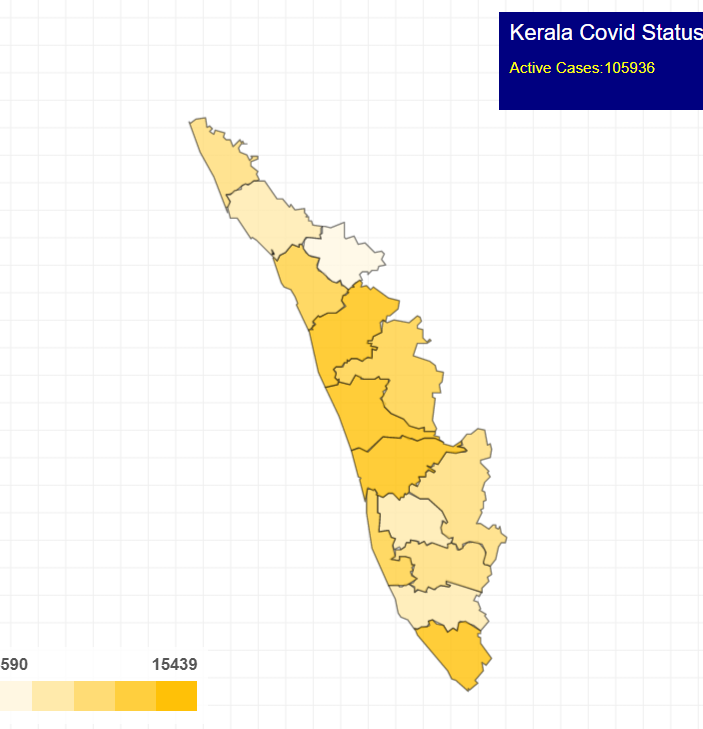

In [7]:
#!pip install folium

In [8]:
cd "F:\Knowledge\ML\courses_ML\Content\My_codes\covid_19_EDA"

F:\Knowledge\ML\courses_ML\Content\My_codes\covid_19_EDA


In [9]:
import folium

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#data download:https://dashboard.kerala.gov.in/dailyreporting-view-public-districtwise.php

In [12]:
df=  pd.read_csv('Data/Kerala_COVID-19 Statistics_summary_state_wise.csv')
m = folium.Map(location=[10.85,76.27], tiles='OpenStreetMap', min_zoom = 1, max_zoom=7, zoom_start=1)
m

In [13]:

for i in range(0, len(df)):
    folium.Circle(location=[df.iloc[i]['Lat'], df.iloc[i]['Long']], color = 'crimson', fill = 'crimson',
                 tooltip =  '<li><bold> District: ' + str(df.iloc[i]['District'])+
                             '<li><bold> Confirmed: ' + str(df.iloc[i]['Confirmed'])+
                             '<li><bold> Death: ' + str(df.iloc[i]['Death']),
                 radius = int(df.iloc[i]['Confirmed'])**0.5).add_to(m)
    
m

In [14]:
import json

In [15]:
Kerala_Dist = json.load(open("district.geojson", "r"))

In [29]:
Dist_id_map = {}
for feature in Kerala_Dist["features"]:
    #print(feature['properties'])
    feature["id"] = feature["properties"]["DT_CEN_CD"]
    #print(feature["id"])
    Dist_id_map[feature["properties"]["DISTRICT"]] = feature["id"]
    
Dist_id_map

{'Alappuzha': 11,
 'Ernakulam': 8,
 'Idukki': 9,
 'Kannur': 2,
 'Kasaragod': 1,
 'Kollam': 13,
 'Kottayam': 10,
 'Kozhikode': 4,
 'Malappuram': 5,
 'Palakkad': 6,
 'Pathanamthitta': 12,
 'Thiruvananthapuram': 14,
 'Thrissur': 7,
 'Wayanad': 3}

In [17]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [18]:
import plotly as py
py.offline.init_notebook_mode(connected = True)

# choropleth

A Choropleth Map is a map composed of colored polygons. It is used to represent spatial variations of a quantity. This page documents how to build outline choropleth maps, but you can also build choropleth tile maps using our Mapbox trace types.

In [19]:
#https://plotly.com/python/choropleth-maps/

In [20]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=Kerala_Dist,
    color="Active",
    hover_name="District",
    hover_data=["District"],
    title="Kerala_Covid_Active_Cases",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [21]:
#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

# Active Cases in Kerala(BAR)

In [22]:
fig_c = px.bar(df, x = 'District', y = 'Active')
fig_c.show()

In [23]:
fig_c = px.bar(df, x = 'District', y = 'Active', color_discrete_sequence=[act])
fig_c.show()

In [24]:
fig_c = px.bar(df, x = 'District', y = 'Active', color_discrete_sequence=[act])
fig_d = px.bar(df, x = 'District', y = 'Death', color_discrete_sequence=[dth])

fig = make_subplots(rows = 1, cols = 2, shared_xaxes=False, horizontal_spacing=0.1,
                   subplot_titles=('Active Cases', 'Deaths Cases'))

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 2)

fig.update_layout(height = 400)

fig.show()

In [25]:
fig_c = px.bar(df, x = 'District', y = 'Active', color_discrete_sequence=[act])
fig_d = px.bar(df, x = 'District', y = 'Death', color_discrete_sequence=[dth])

fig = make_subplots(rows = 1, cols = 1, shared_xaxes=True, horizontal_spacing=0.1)

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 1)

fig.update_layout(height = 400)

fig.show()

In [26]:
fig_c = px.bar(df, x = 'District', y = 'Active', color_discrete_sequence=[act])
fig_d = px.bar(df, x = 'District', y = 'Death', color_discrete_sequence=[dth])

fig = make_subplots(rows = 1, cols = 1, shared_xaxes=True, horizontal_spacing=0.1)

fig.add_trace(fig_c['data'][0], row = 1, col = 1)
fig.add_trace(fig_d['data'][0], row = 1, col = 1)

# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()